# Analyzing the Impact of Chicago’s Energy Rating Placard Policy on Building Energy Use

**Author:** Han Zhang  
**Date:** October 2025  
**Course/Project:** Data Science Research – Chicago Energy Benchmarking  

---

### Summary
This notebook examines how building energy performance in Chicago changed before and after the implementation of the Energy Rating Placard policy in 2019.  
We compare key metrics such as *electricity use (kBtu)* and *Energy Star Score* between the two periods using data from city benchmarking reports.  
The analysis includes visual comparisons, statistical summaries, and interpretations of observed trends, aiming to assess whether energy efficiency improved following the policy’s introduction.


## Section 1: Data Setup

First we begin by loading necessary modules as well as reading in our data. This assumes that reader.py found in /project/src/utils/ has been run already sending joint csv to /project/src/output

In [1]:
# Standard library imports
import sys

# Third-party imports
import pandas as pd

# Add utils folder to Python path
sys.path.append("../utils")

# Local application imports
from plot_utils import compare_variable_distribution

# Define the path to combined CSV
combined_csv_path = "../output/Chicago_Energy_Benchmarking_2014_2023_combined.csv"

# Read the combined dataset
energy_df = pd.read_csv(combined_csv_path)

# Display basic information to confirm successful loading
print(
    f"Loaded combined dataset with {energy_df.shape[0]:,} rows and {energy_df.shape[1]} columns."
)
energy_df.head()

Loaded combined dataset with 25,612 rows and 31 columns.


,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID,Benchmark_Year
0,2014,111290,IIT Research Tower,Submitted,10 West 35th Street,60616,NaN,NaN,DOUGLAS,College/University,...,155,NaN,NaN,"3,887",9.89,41.831398,-87.627230,POINT (-87.62723022 41.83139755),2014-111290,2014
1,2014,158438,Realtor Building,Submitted,430 N. Michigan Ave,60611,NaN,NaN,NEAR NORTH SIDE,Office,...,187,80.0,184.0,"3,048",11.50,41.890376,-87.624680,POINT (-87.62467983 41.8903758),2014-158438,2014
2,2014,103597,30 North LaSalle Street,Submitted,30 North LaSalle Street,60602,NaN,NaN,LOOP,Office,...,150,NaN,NaN,"10,010",9.14,41.882846,-87.632902,POINT (-87.63290243 41.88284628),2014-103597,2014
3,2014,101961,Inland Steel Building,Submitted,30 West Monroe,60603,NaN,NaN,LOOP,Office,...,219,114.0,212.0,"3,898",12.95,41.881090,-87.628589,POINT (-87.62858918 41.88108964),2014-101961,2014
4,2014,102365,Lake View Hi-CPS,Submitted,4015 N Ashland Ave,60613,NaN,NaN,LAKE VIEW,K-12 School,...,111,60.0,104.0,"1,709",6.42,41.955254,-87.668605,POINT (-87.66860456 41.95525436),2014-102365,2014


Next, we will split our data into two dataframes. One going up to 2019 and one from everything after 2019 to observe any potential differences.

In [2]:
# Split the DataFrame into two based on Benchmark_Year
placard_year = 2019
energy_df_pre_2019 = energy_df[energy_df["Benchmark_Year"] < placard_year].copy()
energy_df_post_2019 = energy_df[energy_df["Benchmark_Year"] >= placard_year].copy()

# Print summary of the split
print(f"📊 Entries up to 2019: {energy_df_pre_2019.shape[0]:,} rows")
print(f"📊 Entries after 2019: {energy_df_post_2019.shape[0]:,} rows")

display(energy_df_pre_2019.head(2))
display(energy_df_post_2019.head(2))

📊 Entries up to 2019: 7,991 rows
📊 Entries after 2019: 17,621 rows


,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID,Benchmark_Year
0,2014,111290,IIT Research Tower,Submitted,10 West 35th Street,60616,NaN,NaN,DOUGLAS,College/University,...,155,NaN,NaN,"3,887",9.89,41.831398,-87.62723,POINT (-87.62723022 41.83139755),2014-111290,2014
1,2014,158438,Realtor Building,Submitted,430 N. Michigan Ave,60611,NaN,NaN,NEAR NORTH SIDE,Office,...,187,80.0,184.0,"3,048",11.50,41.890376,-87.62468,POINT (-87.62467983 41.8903758),2014-158438,2014


,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID,Benchmark_Year
7991,2019,175695,Le Cordon Bleu College of Culinary Arts,Exempt,361 W CHESTNUT ST,NaN,NaN,True,NEAR NORTH SIDE,NaN,...,NaN,NaN,NaN,NaN,NaN,41.897976,-87.638370,POINT (-87.63836984 41.89797629),NaN,2019
7992,2019,104735,2516 2526 N KEDZIE BLVD,Not Submitted,2516 2526 N KEDZIE BLVD,NaN,0.0,False,LOGAN SQUARE,NaN,...,NaN,NaN,NaN,NaN,NaN,41.920750,-87.701528,POINT (-87.70152825 41.92075046),NaN,2019


## Section 2: Basic Plots

Now, we will use the compare_variable_distribution function defined in utils/plot_utils.py to compare different statistics before and after 2019. This way we can have a rough measure to judge the impact of the Chicago Energy Rating Placards.

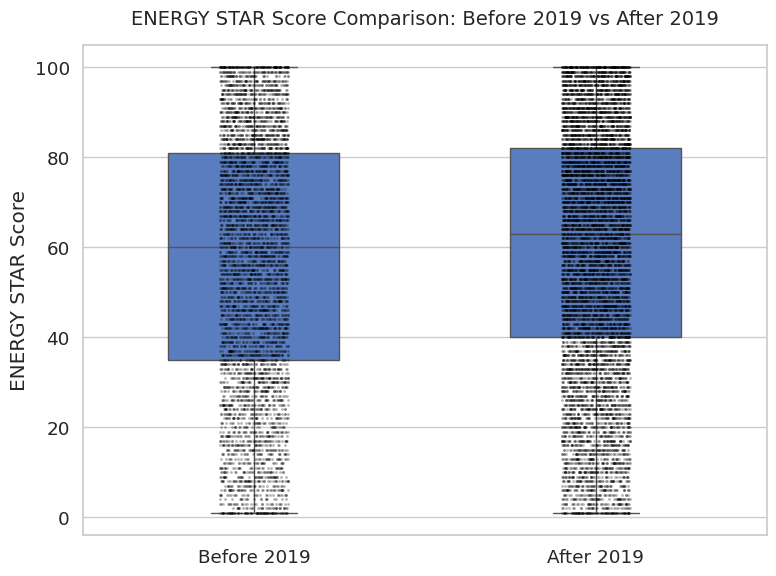

In [3]:
compare_variable_distribution(
    energy_df_pre_2019, energy_df_post_2019, "ENERGY STAR Score"
)

First, observing the ENERGY STAR Score comparison between the two dataframes, we do see a slight improvement in ENERGY STAR Scores starting in 2019.

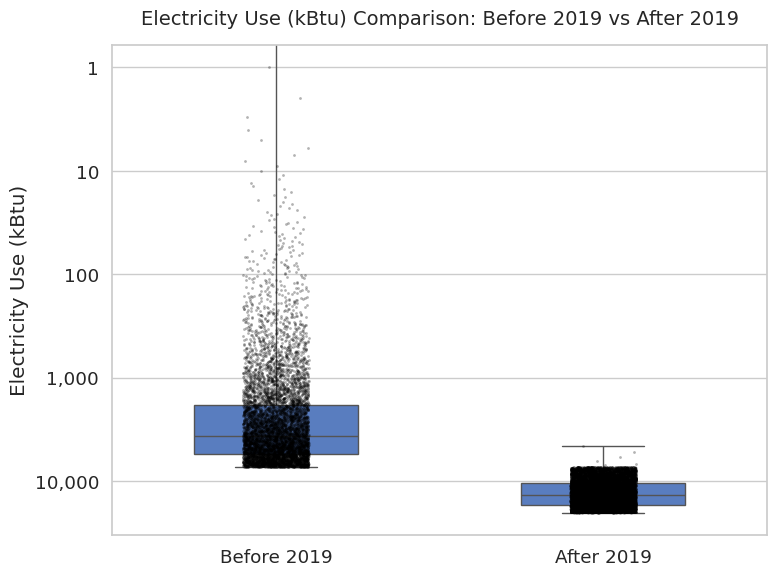

In [4]:
compare_variable_distribution(
    energy_df_pre_2019,
    energy_df_post_2019,
    variable="Electricity Use (kBtu)",
    label1="Before 2019",
    label2="After 2019",
    log_scale=True,
)

Next, we compare the Electricity Use (kBtu) and observe noticeably better usage starting in 2019. A log-scale is used here to compress the wide range and make the patterns more easily visible.

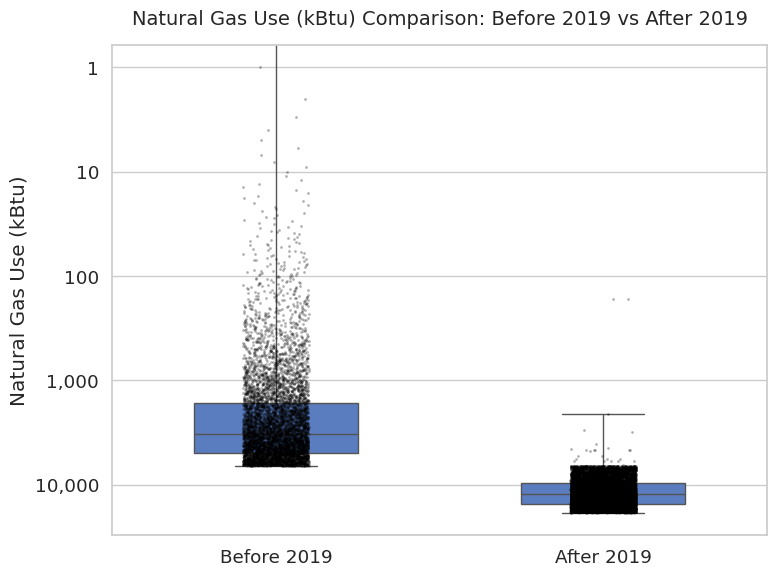

In [5]:
compare_variable_distribution(
    energy_df_pre_2019,
    energy_df_post_2019,
    variable="Natural Gas Use (kBtu)",
    label1="Before 2019",
    label2="After 2019",
    log_scale=True,
)

Looking at the Natural Gas Use (kBtu) we see a similar trend as the previous visualization of Electricity Use.

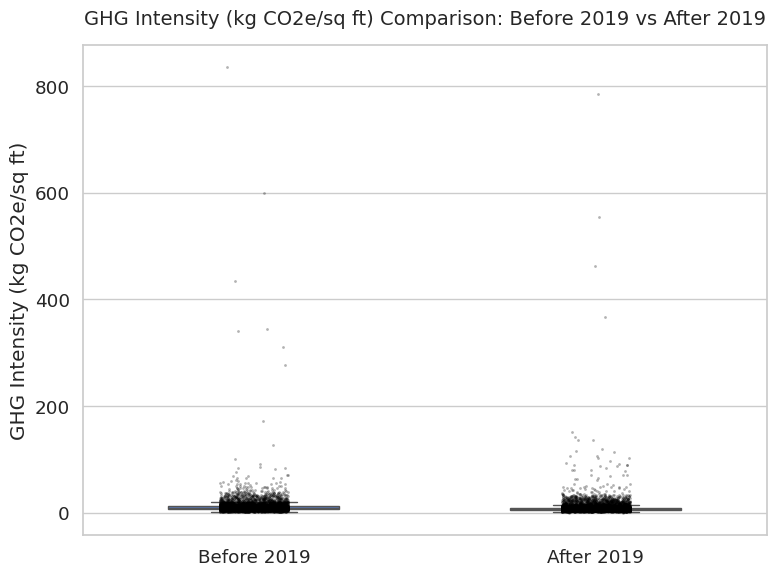

In [6]:
compare_variable_distribution(
    energy_df_pre_2019, energy_df_post_2019, "GHG Intensity (kg CO2e/sq ft)"
)

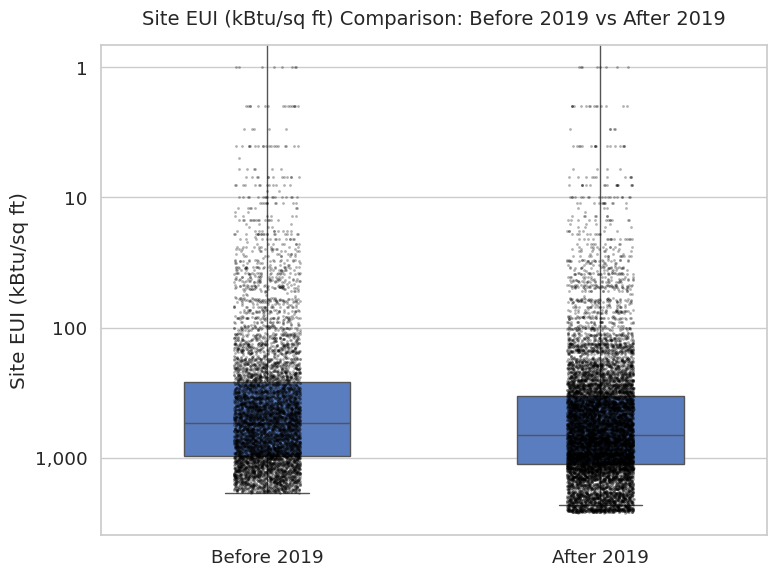

In [7]:
compare_variable_distribution(
    energy_df_pre_2019,
    energy_df_post_2019,
    variable="Site EUI (kBtu/sq ft)",
    label1="Before 2019",
    label2="After 2019",
    log_scale=True,
)

Finally, we compare GHG intensity and Site EUI, but don't see any significant differences between the datasets. 

## Section 3: Conclusions

Overall, we see some evidence in building changes after the implementation of Chicago's Energy Rating Placards. ENERGY STAR Score, Electricity Use, and Natural Gas Use all show improvement starting in 2019 following the implementation of Chicago's Energy Rating Placards. However, we have yet to determine the cause of these improvements as Chicago's Energy Rating Placards may be unrelated. At the same time GHG Intensity and Site EUI don't show significant differences. 